# How to use this notebook
Each of the following sections (called 'cells' in Jupyter terminology) has a brief explanation of the purpose of the activity, the code contained and how to run it. If you aren't sure at any time, you can always go to Moodle and ask a question in the forum.
Some of the cells contain code, there are usually denoted by a marker such as In [1]. There are a number of ways to run the code in these cells and these vary depending on how you are accessing the notebook (Binder, PyCharm, VS Code etc). 
Some of the common ways to run code in a cell are, for each you typically need to click into the cell first before running:

- Look for a menu option such as `Cell > Run Cells and Select Below`
- Look for a `run` icon near the cell. In PyCharm for example there is a double green arrow at the start of the code in the cell.
- Click into the cell itself and then press the Ctrl key on your computer and hold that while you also press the Enter key

Once a cell has run you will typically see some output appear below it. Some cells may take a few seconds to run. Sometimes, if there is no output and no errors, you may not see anything - this should be the case when you run the first cell which loads the libraries.

Note: you need to run the cells in order, typically one cell relies on the outcome of the previous cell so if you skip a cell you may get errors.

# Data cleaning and pre-processing

Data cleansing and preparation is the most critical first step in any data science project. Evidence shows that data scientists will up to 70% of their time cleaning data.

This notebook walks you through an example of the initial steps of data cleansing and pre-processing in Python.

The dataset that we will use for this activity has already been downloaded and is available to the notebook as ```CGD - COVID education policy tracking.csv```. The dataset was downloaded from the [Centre for Global Development](https://www.cgdev.org/blog/schools-out-now-what).

Let's assume that the aim of the project is to answer the question "At what point in the Covid pandemic should a country close schools?" which we are going to answer by creating a bar chart showing the median reported cases of Covid at the time schools were closed in each region. This is a simplistic use of the data set, however the basic data cleaning principles are the same as you might use for your coursework.


## Load the Python libraries

The first step is to import the Python libraries that you will use for pre-processing the data. The most popular Python libraries for working with data are Numpy, Matplotlib and Pandas. You may have used Numpy and Pandas in COMP00015 Intro to programming in Python.

Numpy is mathematical library. 

Pandas is used for importing and managing data sets.

Matplotlib is used for making charts.

You can import these libraries using a shortcut alias. Run the following cell.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xlrd

### Load the data into pandas


We need to load the ```CGD - COVID education policy tracking.csv``` file into a pandas DataFrame. This will allow us to explore and perform some basic cleanup tasks, removing unwanted information, which can slow down the data processing.

The first tasks is to load the data and remove (delete) the first line. This contains irrelevant information, a logo, instead of column headings which would prevent pandas from parsing the data set.

Once you have data in Python, you’ll want to see the data has loaded, and confirm that the expected columns and rows are present and if there are missing values anywhere. To do this you can simply print the data in the Jupyter notebook by typing the name of the DataFrame. This will result in nicely formatted output however you may have a large number of rows and columns. 
The .head() function will display the column names and the first few rows only.

Run the following cell. 

In [6]:
# Load the csv file into a pandas DataFrame and skip the first line which contains the logo
df = pd.read_excel('CGD - COVID education policy tracking.xlsx', sheet_name='School closure tracker- Global', skiprows = 1)

# Give the number of rows and columns in the DataFrame
df.shape


(228, 45)

In [83]:
# View the first 5 rows
df.head()

,Country,Code,Region,Income Group,School Closures,As of,Date,Number of confirmed cases at time of closure,Planned Reopening,Planned Length of Closure (Weeks),...,Other supports - Childcare,Other supports - Childcare (Detail),Other supports - Meals,Other supports - Meals (Details),Other supports - Other,Source,Source.1,Facebook Page,Official COVID Education Policy Document,Source for Re-opening
0,Afghanistan,AFG,South Asia,Low income,Yes,NaN,2020-03-17,22,1 month,4,...,NaN,NaN,NaN,NaN,NaN,https://www-washingtonpost-com.ezp-prod1.hul.h...,https://moe.gov.af/index.php/en/all-news\n\nht...,https://www.facebook.com/MoEAfghanistan/?hc_re...,https://planipolis.iiep.unesco.org/sites/plani...,NaN
1,Albania,ALB,Europe & Central Asia,Upper middle income,Yes,NaN,2020-03-09,2,2 weeks,2,...,NaN,NaN,Self-employed families receive cash benefit,NaN,NaN,https://balkaninsight.com/2020/03/09/albania-c...,NaN,https://www.facebook.com/arsimitsportitdherinise/,NaN,NaN
2,Algeria,DZA,Middle East & North Africa,Upper middle income,Yes,NaN,2020-03-12,24,2020-04-05 00:00:00,3.42857,...,NaN,NaN,NaN,NaN,NaN,https://www.africanews.com/2020/03/16/coronavi...,http://www.education.gov.dz/,https://www.facebook.com/EducationAlgerie/,NaN,NaN
3,American Samoa,ASM,East Asia & Pacific,Upper middle income,Yes,NaN,2020-03-23,NaN,30 days,4,...,NaN,NaN,NaN,NaN,NaN,https://www.doe.as/\n\nhttps://www.doe.as/file...,https://www.doe.as/files/user/2/file/2020-AMEN...,https://www.facebook.com/americansamoagov.gov/,NaN,NaN
4,Andorra,AND,Europe & Central Asia,High income,Yes,NaN,2020-03-13,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.leparisien.fr/societe/coronavirus-l...,NaN,NaN,NaN,NaN


### Delete unnecessary columns

Delete columns that you either don't need or contain values that you are not useful to you. In this example we don't need the columns with URLs and large amounts of text.

The pandas DataFrame [drop()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) method can be used to remove column. 

The following cell shows examples of some of the ways you can remove columns. Use the documentation link above for other options.

Run the following cell to the remove the indicated columns.

In [84]:
# Remove a single column with the name 'Source for Re-opening'. The parameter axis=1 refers to a column (row would be axis=0).
df = df.drop(['Source for Re-opening'], axis = 1)

# Remove two columns named 'Facebook Page' and 'Official COVID Education Policy Document'
df = df.drop(['Facebook Page', 'Official COVID Education Policy Document'], axis = 1)

# Remove columns 40 and 41
df = df.drop(df.columns[[40, 41]], axis = 1)

# View the data again to check the final 5 columns have been removed
df.head()

,Country,Code,Region,Income Group,School Closures,As of,Date,Number of confirmed cases at time of closure,Planned Reopening,Planned Length of Closure (Weeks),...,Plans for Special Education? (Y/N),Special Education detail,Broader workplace closures?,Existing Cash Transfer Supplemented?,Details of Cash Transfer / social proection program,Other supports - Childcare,Other supports - Childcare (Detail),Other supports - Meals,Other supports - Meals (Details),Other supports - Other
0,Afghanistan,AFG,South Asia,Low income,Yes,NaN,2020-03-17,22,1 month,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,ALB,Europe & Central Asia,Upper middle income,Yes,NaN,2020-03-09,2,2 weeks,2,...,NaN,NaN,NaN,Yes,"""Recipients of Ndihma Economike (flagship cash...",NaN,NaN,Self-employed families receive cash benefit,NaN,NaN
2,Algeria,DZA,Middle East & North Africa,Upper middle income,Yes,NaN,2020-03-12,24,2020-04-05 00:00:00,3.42857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,American Samoa,ASM,East Asia & Pacific,Upper middle income,Yes,NaN,2020-03-23,NaN,30 days,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Europe & Central Asia,High income,Yes,NaN,2020-03-13,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Look at the csv and remove at least one other unnecessary column. 

Use the cell below to add your code and run the cell when you are ready.

In [85]:
# Add code to remove another unnecessary column


## Handle missing values

Missing values can be the most common feature of unclean data. These values are usually in the form of NaN or None.

There are many reasons for values to be missing, for example because they don't exist, or because of improper data collection or improper data entry. For example, if someone is underage and the issue applies to someone older than 18, the question will contain missing values.

There are many ways to deal with missing values:
- Do nothing (this may be appropriate in some circumstances).
- If your data set is large enough and/or the percentage of missing values is high, you may choose to delete the rows and columns that contain the missing data;
- Use an imputation technique to fill the missing values (e.g. mean, median, most frequent etc)

The decision will depend on the type of data, the actions you want to perform on the data, and the reasons for the missing values. [This article on Towards Data Science](https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779) gives pros and cons of some common imputation techniques. You are not expected to understand the specific imputation techniques and make an informed choice to apply to your coursework. For this course it is sufficient that you understand the implications of missing data and make an informed decision whether to do nothing, remove data or use imputation.

### Handling inconsistent values

When there are different unique values in the column, an inconsistency can occur. Examples include:
- Text data: Imagine a text field that contains 'Juvenile', 'juvenile' and ' juvenile ' in the same column, you could remove spaces and convert all data to lowercase. If there are a large number of inconsistent unique entries, you cannot manually check the closest match, in which case there are various packages that can be used (e.g. Fuzzy Wuzzy string matching).
- Date/time data: Inconsistent date format, such as dd / mm / yy and mm / dd / yy in the same column. Your date value may not be the correct data type, which will not allow you to perform actions efficiently and gain insight from it. 


### Example: Delete all columns that have more than 50% of the values missing

In [86]:
# List the columns showing the % of missing values
#df.isnull().sum()
df.isnull().sum()/len(df)

Country                                                                0.043860
Code                                                                   0.043860
Region                                                                 0.043860
Income Group                                                           0.043860
School Closures                                                        0.057018
As of                                                                  0.942982
Date                                                                   0.135965
Number of confirmed cases at time of closure                           0.179825
Planned Reopening                                                      0.206140
Planned Length of Closure (Weeks)                                      0.478070
Closure extended?                                                      0.785088
Planned re-opening 2                                                   0.807018
Details of closure                      

In [87]:
# Drop columns that have more than 50% of the values missing
half_count = len(df)/2
df = df.dropna(thresh=half_count, axis=1)

# If we look at the shape of the data now we should see the number of columns is reduced
df.shape

(228, 16)

### Rename the data set

It is a good practice to name the filtered data set differently to separate it from the original data. This ensures that you still have the raw data in case you need to return it.

In [88]:
# Save the DataFrame back to a new csv. 'index=False' indicates that row names should not be saved.
df.to_csv("cleaned_dataset.csv", index=False)

## Explore and visualise the data

Take some time to explore it and understand what each column represents. A manual review of the data set is important to avoid errors in the data analysis and modeling process.

To address the question "Let's assume that the aim of the project is to answer the question "At what point in the Covid pandemic should a country close schools?" which we are going to answer by creating a bar chart showing the median reported cases of Covid at the time schools were closed in each region

In this example we could look at a matrix with three variables: Country, Number of confirmed cases at time of closure, Region

In our example the target column is the first column, you can create a dependent variable matrix by typing:

```closure = df.loc[:, ['Country','Region','Number of confirmed cases at time of closure']]``` 

The first colon ```:``` means that we want all the lines in our data set. 

In [89]:
# Rename the 'Number of confirmed cases at time of closure' column for ease of reference
df = df.rename(columns={'Number of confirmed cases at time of closure': 'Cases'})

# Create a new DataFrame with the 3 required columns
df2 = df.loc[:,['Country','Region','Cases']]

# Display the new DataFrame
df2

,Country,Region,Cases
0,Afghanistan,South Asia,22
1,Albania,Europe & Central Asia,2
2,Algeria,Middle East & North Africa,24
3,American Samoa,East Asia & Pacific,NaN
4,Andorra,Europe & Central Asia,2
5,Angola,Sub-Saharan Africa,0
6,Antigua and Barbuda,Latin America & Caribbean,1
7,Argentina,Latin America & Caribbean,56
8,Armenia,Europe & Central Asia,45
9,Aruba,Latin America & Caribbean,2


If we look at the data in the cases column we have 'NaN' values and some values that are not numerical (e.g. 10>). We will need to handle these inconsistencies before we can calculate the median cases.


The original spreadsheet contained blanks for some of the fields, it is assumed that we don't know the number of cases at the time of closure for these countries. It might be reasonable to assume that these were zero, or it may be safer to use only data that we are happy is valid to calculate the median.

Let's go with the second of these approaches.


In [90]:
# Remove all rows that contain NaN values
df2 = df2.dropna()

# Reset the index
df2 = df2.reset_index(drop=True)

df2

,Country,Region,Cases
0,Afghanistan,South Asia,22
1,Albania,Europe & Central Asia,2
2,Algeria,Middle East & North Africa,24
3,Andorra,Europe & Central Asia,2
4,Angola,Sub-Saharan Africa,0
5,Antigua and Barbuda,Latin America & Caribbean,1
6,Argentina,Latin America & Caribbean,56
7,Armenia,Europe & Central Asia,45
8,Aruba,Latin America & Caribbean,2
9,Australia,East Asia & Pacific,2364


We could also force all of the other cells that have non-numeric data to be converted to NaN however I would first like to see which rows are affected.

One way is to test which rows do not contain integer values.

Run the following cell.

In [91]:
df2[df2['Cases'].apply(lambda x: not isinstance(x, int))]

,Country,Region,Cases
11,Azerbaijan,Europe & Central Asia,>10
126,Norway,Europe & Central Asia,1000+


We can see that two countries are affected. We might choose to see the effect of different ways of dealing with this in the final data analysis, e.g. we could remove the two rows and model the effect, and change >10 to 10 and 1000+ to 1000 and then compare the results of the two models before deciding which change to make.

For now let's replace the values rather than remove them.

In [92]:
df2.loc[11, 'Cases'] = 10
df2.loc[126, 'Cases'] = 1000

# If we now check again for non-integer rows we should have no rows displayed
df2[df2['Cases'].apply(lambda x: not isinstance(x, int))]

,Country,Region,Cases


### Visualise the data
First we need to calculate the median Covid cases at the date of closure for a region. We can aggregate the data in the region column using 'Group By' and then calculate the median for the number of cases.

```df2.groupby("Region")["Cases"].median()```

However, if you check the datatype of the 'Cases' column by entering ```df2.types``` you will see that 'Cases' has a datatype of Object rather than int. We cannot calculate a median for an object datatype so we first need to convert it to integer.

In [93]:
df2["Cases"] = df2["Cases"].astype(str).astype(int)
chart_df = df2.groupby("Region")["Cases"].median()
chart_df

Region
East Asia & Pacific            15.0
Europe & Central Asia          27.0
Latin America & Caribbean       3.0
Middle East & North Africa     17.0
North America                 122.0
South Asia                     11.5
Sub-Saharan Africa              1.5
Name: Cases, dtype: float64

AttributeError: module 'matplotlib.pyplot' has no attribute 'xaxis'

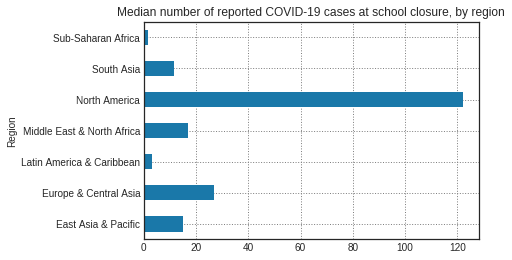

In [95]:
# Draw a horizontal bar chart
chart_df.plot.barh(x="Region", y="Cases", title="Median number of reported COVID-19 cases at school closure, by region", color="#1a78a9")

# Display the major grid lines
plt.grid(which='major', linestyle=':', linewidth='1', color='grey')

# Show the chart
plt.show()

Compare the results of the chart with that produced in [Figure 2 of the School's out: now what? article](https://www.cgdev.org/blog/schools-out-now-what)

## Further practice
[This Kaggle challenge](https://www.kaggle.com/rtatman/data-cleaning-challenge-handling-missing-values) gives 5 examples that walk you through the techniques for handling missing values, scaling and normalization, parsing dates, character encodings and inconsistent data entry. I have not worked through all of these however they appear to build on the concepts introduced in this notebook and offer valuable practice.